<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Tinnitus_Dynamic_ML_Tunning_with_featSelect_SHAP_ROC_Version_800.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import numpy as np
import pandas as pd
#dataset=pd.read_csv("/content/drive/MyDrive/SNU Research/Tinnitus/Tinnitus_ALR&EEG_2022.08.18_final.csv")
 
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Latest/Tinnitus_ALR&EEG_2022.08.25.csv")

classes = np.array(sorted(list(set(dataset.iloc[:, 1]))))

In [30]:
dataset.head()

,Subjects,SubjectTypeClass,TestType,n0_gap_peak_ms_20ms,p1_gap_peak_ms_20ms,n1_gap_peak_ms_20ms,p2_gap_peak_ms_20ms,n2_gap_peak_ms_20ms,p3_gap_peak_ms_20ms,n0_nogap_peak_ms_20ms,...,MeanP_Gamma_50ms,TotalEEGPower_50ms,RelativeAlpha_50ms,RelativeBeta_50ms,RelativeTheta_50ms,RelativeDelta_50ms,DTR_50ms,DTABR_50ms,ATR_50ms,ABR_50ms
0,JSY,Patient,Test,115,151,256,308,339,170,146,...,0.000003,0.000049,0.181,0.1910,0.303,0.325,1.070,1.69,0.598,0.951
1,KJH,Patient,Test,90,149,242,315,456,102,148,...,0.000002,0.000098,0.119,0.0552,0.429,0.396,0.923,4.74,0.277,2.160
2,KKT,Patient,Test,102,151,214,267,337,89,152,...,0.000010,0.000043,0.151,0.1620,0.446,0.241,0.541,2.20,0.339,0.934
3,SDS,Patient,Test,121,147,205,277,412,70,160,...,0.000003,0.000040,0.194,0.1840,0.486,0.136,0.279,1.65,0.398,1.050
4,KDK,Patient,Test,162,137,227,303,393,127,185,...,0.000004,0.000037,0.152,0.1080,0.518,0.221,0.427,2.84,0.294,1.400


In [31]:
set(list(dataset['SubjectTypeClass']))

{'Control', 'Patient'}

In [32]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset.iloc[:, 1]=encoder.fit_transform(dataset.iloc[:, 1])

In [33]:
set(list(dataset['SubjectTypeClass']))

{0, 1}

#Feature Selection (User Defined with Index Range)


*   Index- [245]  to  [274] -> EEG Features
*   Index- [4]    to  [243] -> Normal Features



In [34]:
'''
list_of_feat=[]
norm_start=int(input("Normal Features Start Index:"))
norm_end=int(input("Normal Features End Index:"))
eeg_start=int(input("EEG Features Start Index:"))
eeg_end=int(input("EEG Features End Index:"))



list_of_feat=list(dataset.iloc[:0,norm_start:norm_end])+list(dataset.iloc[:0,eeg_start:eeg_end])
'''

'\nlist_of_feat=[]\nnorm_start=int(input("Normal Features Start Index:"))\nnorm_end=int(input("Normal Features End Index:"))\neeg_start=int(input("EEG Features Start Index:"))\neeg_end=int(input("EEG Features End Index:"))\n\n\n\nlist_of_feat=list(dataset.iloc[:0,norm_start:norm_end])+list(dataset.iloc[:0,eeg_start:eeg_end])\n'

#Feature Selection (User Defined with Individual Feature)

**Please Input 'Subject' colunm name first**

In [35]:
'''list_of_feat=[]
num=int(input("Input number of features: "))

for i in range(num):
  print(i+1,".")
  list_of_feat.append(input("Feature Name: "))'''


'list_of_feat=[]\nnum=int(input("Input number of features: "))\n\nfor i in range(num):\n  print(i+1,".")\n  list_of_feat.append(input("Feature Name: "))'

#Feature Selection (Model Free)

<font color='red'> Warning: Run only one Type at a time</font>

**Type-1**

In [36]:
'''from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']'''


"from sklearn.feature_selection import SelectKBest\nbestfeatures_1 = SelectKBest(k=10)\nfit = bestfeatures_1.fit(X_,y_)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']"

**Type-2**

In [37]:
'''
from sklearn.feature_selection import SelectKBest,f_classif
bestfeatures_2=SelectKBest(f_classif, k=10)
fit = bestfeatures_f2fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
'''

"\nfrom sklearn.feature_selection import SelectKBest,f_classif\nbestfeatures_2=SelectKBest(f_classif, k=10)\nfit = bestfeatures_f2fit(X_,y_)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']\n"

**Type-3**

In [38]:
'''
from sklearn.feature_selection import SelectFpr, f_classif

bestfeatures_3=SelectFpr(f_classif, alpha=0.1)
fit = bestfeatures_3.fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
'''

"\nfrom sklearn.feature_selection import SelectFpr, f_classif\n\nbestfeatures_3=SelectFpr(f_classif, alpha=0.1)\nfit = bestfeatures_3.fit(X_,y_)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']\n"

<font color='blue' size=6><b>Input</b></font>

In [39]:
'''number_of_feat=int(input("Number Of Best Features: "))'''

'number_of_feat=int(input("Number Of Best Features: "))'

In [40]:
'''imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)'''

"imp=featureScores.nlargest(number_of_feat,'Score')\nprint(imp)"

In [41]:
'''
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])
  '''

'\nlist_of_feat=[]\n\nfor i in range(number_of_feat):\n  list_of_feat.append(imp.iloc[:,0:1].values[i][0])\n  '

#Feature Selection (Model Based)

<font color='blue' size=6><b>Input</b></font>

In [42]:
'''number_of_feat=int(input("Number Of Best Features: "))'''

'number_of_feat=int(input("Number Of Best Features: "))'

In [43]:
'''from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
sfs.fit(X_, y_)
list_of_feat=[]
list_of_feat=list(sfs.get_feature_names_out(list(dataset.iloc[:0,4:])))'''

'from sklearn.feature_selection import SequentialFeatureSelector\nfrom sklearn.neighbors import KNeighborsClassifier\nknn = KNeighborsClassifier(n_neighbors=3)\nsfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)\nsfs.fit(X_, y_)\nlist_of_feat=[]\nlist_of_feat=list(sfs.get_feature_names_out(list(dataset.iloc[:0,4:])))'

#Data Spliting

You can remove it. I added for not to input all the features for every runtime

In [44]:
list_of_feat=["Subjects",
              "p3_gap_peak_amp_20ms",
    "p3_gap_peak_amp_50ms",
    "p1_gap_peak_amp_20ms",
    "p1_gap_peak_amp_50ms",
    "gap_AUC_n1p2_R_20ms",
    "gap_AUC_n1p2_R_50ms",
    "n1p3_interval_nogap_20ms",
    "n1p3_interval_nogap_50ms",
    "n2_gap_peak_amp_20ms",
    "n2_gap_peak_amp_50ms",
    "p2n2_gap_nogap_diff_20ms",
    "p2n2_gap_nogap_diff_50ms",
    "gap_AUC_n1p2_L_20ms",
    "gap_AUC_n1p2_L_50ms",
    "gap_AUC_p1n1_R_20ms",
    "gap_AUC_p1n1_R_50ms",
    "gap_AUC_n1p2n2_20ms",
    "gap_AUC_n1p2n2_50ms",
    "n2_nogap_peak_ms_20ms",
    "n2_nogap_peak_ms_50ms",
    "n1p2_gap_no_gap_ratio_20ms",
    "n1p2_gap_no_gap_ratio_50ms",
    "PeakF_Theta_20ms",
    "PeakF_Theta_50ms",
    "SpectralEdge_Delta_20ms",
    "SpectralEdge_Delta_50ms",
    "RelativeAlpha_20ms",
    "RelativeAlpha_50ms",
    "DTABR_20ms",
    "DTABR_50ms"]

print(len(list_of_feat))

31


In [45]:
print(list_of_feat)

['Subjects', 'p3_gap_peak_amp_20ms', 'p3_gap_peak_amp_50ms', 'p1_gap_peak_amp_20ms', 'p1_gap_peak_amp_50ms', 'gap_AUC_n1p2_R_20ms', 'gap_AUC_n1p2_R_50ms', 'n1p3_interval_nogap_20ms', 'n1p3_interval_nogap_50ms', 'n2_gap_peak_amp_20ms', 'n2_gap_peak_amp_50ms', 'p2n2_gap_nogap_diff_20ms', 'p2n2_gap_nogap_diff_50ms', 'gap_AUC_n1p2_L_20ms', 'gap_AUC_n1p2_L_50ms', 'gap_AUC_p1n1_R_20ms', 'gap_AUC_p1n1_R_50ms', 'gap_AUC_n1p2n2_20ms', 'gap_AUC_n1p2n2_50ms', 'n2_nogap_peak_ms_20ms', 'n2_nogap_peak_ms_50ms', 'n1p2_gap_no_gap_ratio_20ms', 'n1p2_gap_no_gap_ratio_50ms', 'PeakF_Theta_20ms', 'PeakF_Theta_50ms', 'SpectralEdge_Delta_20ms', 'SpectralEdge_Delta_50ms', 'RelativeAlpha_20ms', 'RelativeAlpha_50ms', 'DTABR_20ms', 'DTABR_50ms']


In [46]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 1]

In [47]:
X_new.shape

(244, 31)

In [48]:
y_new.shape

(244,)

In [49]:
'''from sklearn.model_selection import train_test_split
X_train_with_subject, X_test_with_subject, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.10655737705, random_state = 0)'''

'from sklearn.model_selection import train_test_split\nX_train_with_subject, X_test_with_subject, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.10655737705, random_state = 0)'

In [50]:
X_train_with_subject=X_new.iloc[:218,:]  
X_test_with_subject=X_new.iloc[218:,:]
y_train=y_new.iloc[:218]
y_test=y_new.iloc[218:]

In [51]:
X_train_with_subject

,Subjects,p3_gap_peak_amp_20ms,p3_gap_peak_amp_50ms,p1_gap_peak_amp_20ms,p1_gap_peak_amp_50ms,gap_AUC_n1p2_R_20ms,gap_AUC_n1p2_R_50ms,n1p3_interval_nogap_20ms,n1p3_interval_nogap_50ms,n2_gap_peak_amp_20ms,...,n1p2_gap_no_gap_ratio_20ms,n1p2_gap_no_gap_ratio_50ms,PeakF_Theta_20ms,PeakF_Theta_50ms,SpectralEdge_Delta_20ms,SpectralEdge_Delta_50ms,RelativeAlpha_20ms,RelativeAlpha_50ms,DTABR_20ms,DTABR_50ms
0,JSY,3.126180,6.557410,3.740526,3.423469,0.443360,0.214856,-0.005168,5.153802,3.074384,...,-285.617697,-333.685010,5.058368,7.392998,5.447472,7.003892,0.1490,0.1810,2.11,1.69
1,KJH,3.012943,3.887590,5.552048,3.745150,0.195951,0.124959,1.823032,2.584809,4.010531,...,-312.698422,-311.454916,4.280158,4.280158,4.669262,5.058368,0.1120,0.1190,3.45,4.74
2,KKT,9.122776,9.531450,5.825824,5.789255,0.277219,0.301900,4.585858,6.904603,9.705150,...,-648.977491,-620.276260,3.501946,3.501946,4.280156,4.669262,0.1370,0.1510,3.42,2.20
3,SDS,23.485020,13.832391,22.948811,13.839559,0.116512,0.175110,17.809355,8.884575,22.864731,...,-1370.922528,-899.308220,4.280158,5.447472,4.669262,5.447472,0.1870,0.1940,2.03,1.65
4,KDK,6.996277,7.168810,7.402504,5.880882,0.154960,0.139536,4.871202,6.388872,7.168642,...,-316.048524,-235.387237,3.891052,3.501946,4.280156,3.891050,0.1180,0.1520,3.97,2.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,KTS,8.148390,6.811314,7.995180,7.101645,0.093025,0.145446,4.986209,4.045323,7.650185,...,-298.115480,-300.845847,5.836578,3.891050,5.447474,4.669262,0.1930,0.1190,1.41,3.17
214,LSM,4.776646,7.310949,5.836057,6.804252,0.170094,0.176876,1.885845,3.071032,4.627091,...,-223.881302,-424.087203,5.058366,7.003892,5.058368,5.836578,0.1610,0.1940,2.43,1.35
215,LCN,4.866784,4.283891,3.488975,1.970176,0.263754,0.450968,0.771491,0.365169,4.150460,...,-396.562554,-477.794921,4.280156,4.280156,5.058368,4.669262,0.0833,0.0908,4.91,5.69
216,KJJ,4.048543,7.743602,3.516197,6.927526,0.226510,0.497487,1.451675,4.463715,4.177494,...,-191.205416,-367.439856,5.058368,5.447474,5.058368,5.836578,0.1160,0.1100,4.45,4.53


In [52]:
X_test_with_subject

,Subjects,p3_gap_peak_amp_20ms,p3_gap_peak_amp_50ms,p1_gap_peak_amp_20ms,p1_gap_peak_amp_50ms,gap_AUC_n1p2_R_20ms,gap_AUC_n1p2_R_50ms,n1p3_interval_nogap_20ms,n1p3_interval_nogap_50ms,n2_gap_peak_amp_20ms,...,n1p2_gap_no_gap_ratio_20ms,n1p2_gap_no_gap_ratio_50ms,PeakF_Theta_20ms,PeakF_Theta_50ms,SpectralEdge_Delta_20ms,SpectralEdge_Delta_50ms,RelativeAlpha_20ms,RelativeAlpha_50ms,DTABR_20ms,DTABR_50ms
218,HGH,10.518541,8.250342,8.777186,5.641482,0.107065,0.250076,8.424574,6.969909,9.666805,...,-529.046868,-312.636559,3.501948,5.058368,4.280156,4.669262,0.1750,0.1740,1.53,1.68
219,HYG,6.092244,6.652006,4.242543,5.243989,0.243233,0.325882,3.841096,2.574947,6.408916,...,-335.238568,-366.509737,3.891052,3.891054,3.891050,4.669262,0.0904,0.1390,5.37,2.98
220,BYW,0.319030,0.323423,0.292283,0.250037,0.224292,0.235461,0.207523,0.136761,0.239700,...,-7.131002,-19.047684,5.447472,5.447474,5.447472,5.058368,0.2100,0.1690,1.77,2.76
221,CJH,9.881317,7.994322,6.970063,4.511942,0.445624,0.605024,2.926703,4.730498,6.347445,...,-389.305879,-460.159865,5.058366,8.171210,6.614788,9.338524,0.2370,0.3200,1.93,1.09
222,HKS,2.952304,5.700634,5.538156,5.619215,0.208512,0.209976,3.413165,2.331421,4.926335,...,-206.550674,-204.634674,4.280156,3.891052,5.058366,4.280156,0.1490,0.1390,2.41,2.52
223,HCN,2.684000,3.012260,1.930590,1.381948,0.352265,0.551168,0.633811,0.976124,2.426625,...,-202.228231,-252.976913,3.501946,3.891050,3.891050,3.891050,0.0808,0.0940,7.32,5.94
224,HCN,5.917771,3.327281,12.131990,4.202533,0.079537,0.044135,6.711920,0.980738,6.834160,...,-407.226129,-116.326162,4.280158,4.280158,4.669262,5.058368,0.1410,0.1340,2.85,3.56
225,HYG,6.869657,5.032932,4.967371,6.180843,0.354912,0.332026,2.099702,5.425067,6.029067,...,-339.757688,-439.712963,6.225684,5.058368,7.392996,5.058366,0.2340,0.1910,1.07,1.64
226,BYW,6.517561,7.821664,2.929887,6.065540,0.236077,0.347635,4.947516,3.157180,7.769840,...,-426.437392,-361.580491,5.058368,5.058368,5.447472,5.058368,0.1410,0.1570,3.77,3.00
227,HKS,3.738782,7.349214,4.770803,4.101451,0.197828,0.197740,4.131827,3.889128,5.224312,...,-378.315377,-223.812815,3.501946,4.280156,4.280156,4.669260,0.1520,0.1520,2.29,2.01


In [53]:
X_train = X_train_with_subject.iloc[:,1:]
X_test  = X_test_with_subject.iloc[:,1:]

In [54]:
result={}



---





---



#ADABOOST

In [55]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[10  3]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.81      1.00      0.90        13

    accuracy                           0.88        26
   macro avg       0.91      0.88      0.88        26
weighted avg       0.91      0.88      0.88        26

Accurecy:  0.8846153846153846


1/200 round completed......................... Accurecy: 0.7692307692307693
2/200 round completed......................... Accurecy: 0.7692307692307693
3/200 round completed......................... Accurecy: 0.9615384615384616
4/200 round completed......................... Accurecy: 0.9615384615384616
5/200 round completed......................... Accurecy: 0.9615384615384616
6/200 round completed......................... Accurecy: 0.9615384615384616
7/200 round completed......................... Accurecy: 0.8076923076923077
8/200 round completed......................... Accurecy: 0.9615384615384616
9/200 round completed......................... Accurecy: 0.9230769230769231
10/200 round completed......................... Accurecy: 0.8846153846153846
11/200 round completed......................... Accurecy: 0.8846153846153846
12/200 round completed......................... Accurecy: 0.8846153846153846
13/200 round completed......................... Accurecy: 0.8846153846153846
14/200 r

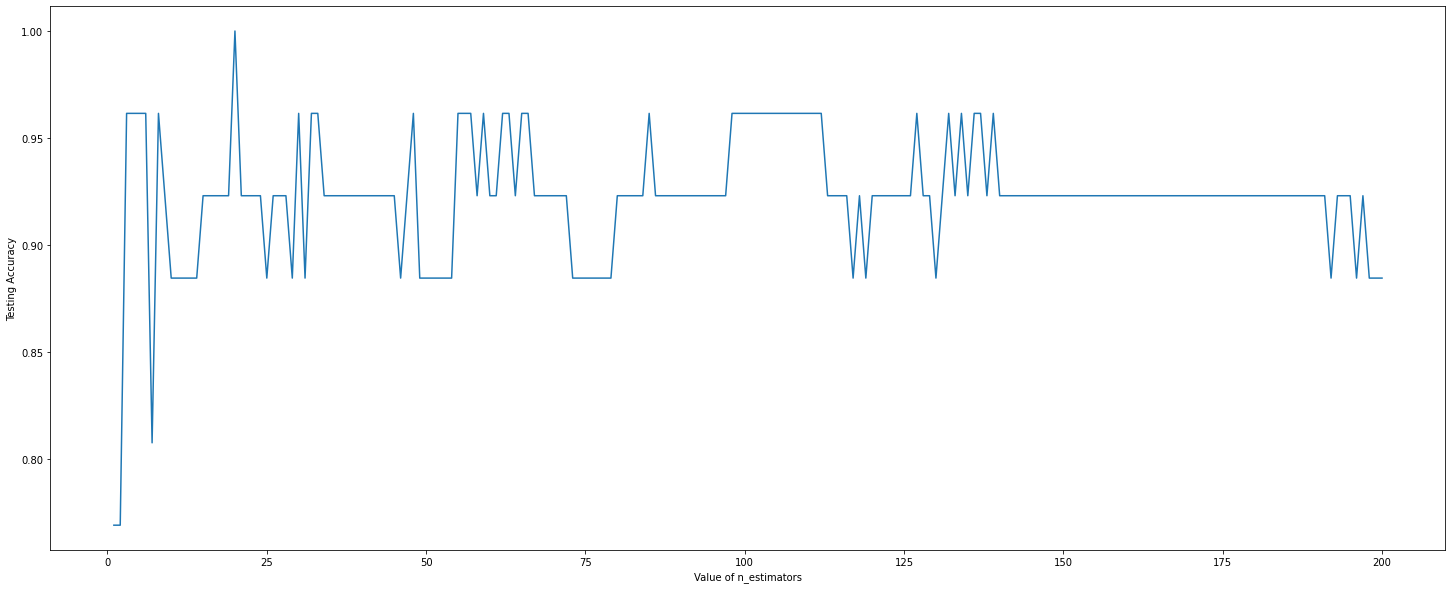

In [56]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [57]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[13  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

Accurecy:  1.0




---



---



#Graddient Boosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  1]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26

Accurecy:  0.9615384615384616


1/150 round completed......................... Accurecy: 0.5
2/150 round completed......................... Accurecy: 0.5
3/150 round completed......................... Accurecy: 0.6923076923076923
4/150 round completed......................... Accurecy: 0.6538461538461539
5/150 round completed......................... Accurecy: 0.6538461538461539
6/150 round completed......................... Accurecy: 0.7307692307692307
7/150 round completed......................... Accurecy: 0.7692307692307693
8/150 round completed......................... Accurecy: 0.8076923076923077
9/150 round completed......................... Accurecy: 0.8076923076923077
10/150 round completed......................... Accurecy: 0.8076923076923077
11/150 round completed......................... Accurecy: 0.8076923076923077
12/150 round completed......................... Accurecy: 0.8461538461538461
13/150 round completed......................... Accurecy: 0.8461538461538461
14/150 round completed................

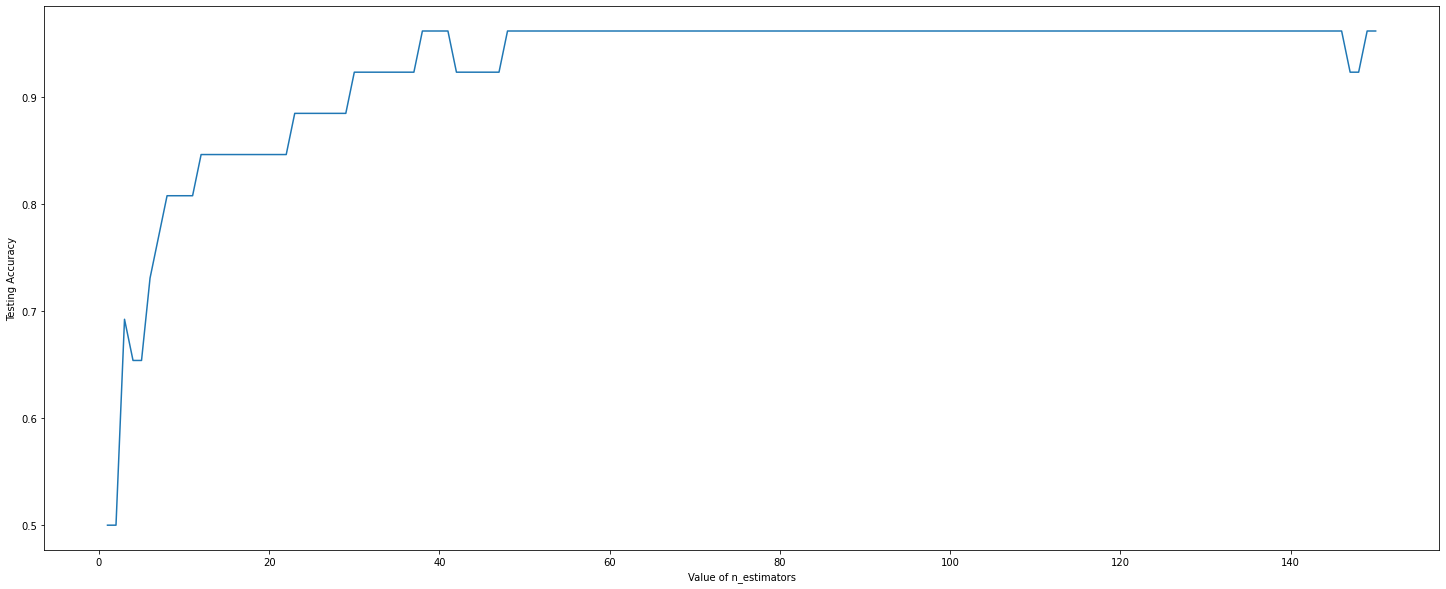

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.8846153846153846
2/30 round completed......................... Accurecy: 0.9230769230769231
3/30 round completed......................... Accurecy: 0.9615384615384616
4/30 round completed......................... Accurecy: 0.9230769230769231
5/30 round completed......................... Accurecy: 0.9615384615384616
6/30 round completed......................... Accurecy: 0.9615384615384616
7/30 round completed......................... Accurecy: 0.8461538461538461
8/30 round completed......................... Accurecy: 0.8846153846153846
9/30 round completed......................... Accurecy: 0.8846153846153846
10/30 round completed......................... Accurecy: 0.8461538461538461
11/30 round completed......................... Accurecy: 0.8461538461538461
12/30 round completed......................... Accurecy: 0.8461538461538461
13/30 round completed......................... Accurecy: 0.8461538461538461
14/30 round completed

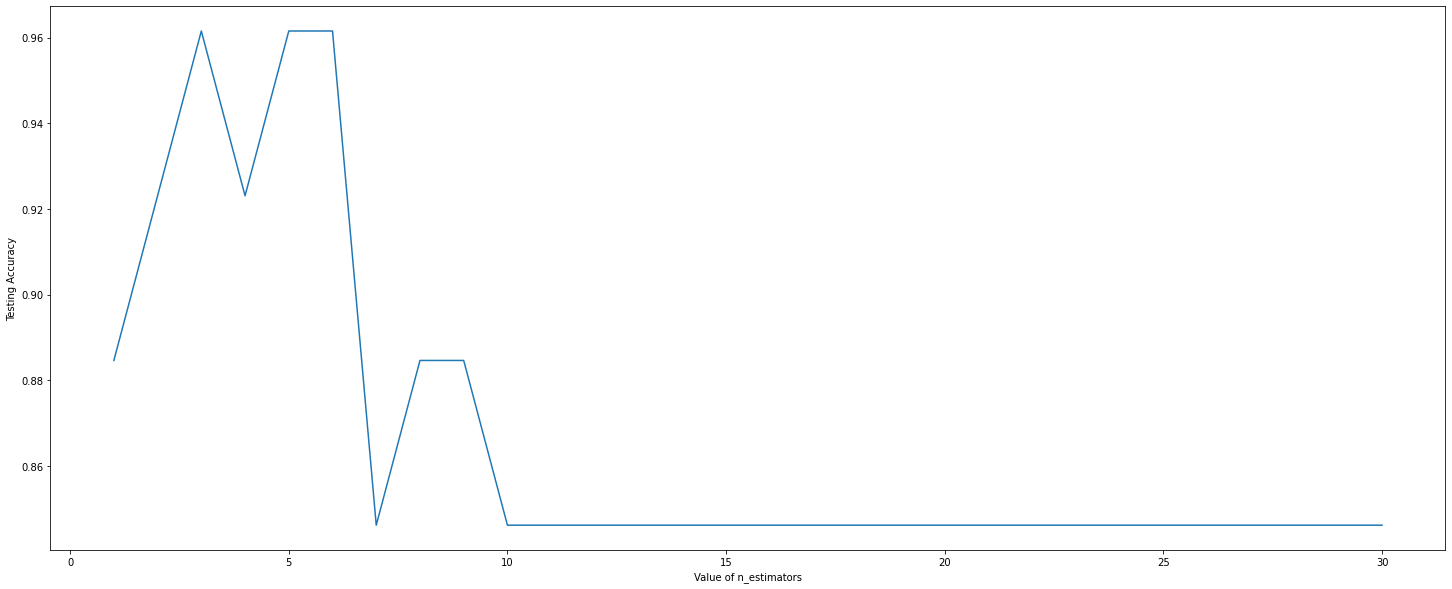

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  1]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26

Accurecy:  0.9615384615384616


In [62]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  1]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26

Accurecy:  0.9615384615384616


In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  1]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26

Accurecy:  0.9615384615384616




---



---



#Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[11  2]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.87      1.00      0.93        13

    accuracy                           0.92        26
   macro avg       0.93      0.92      0.92        26
weighted avg       0.93      0.92      0.92        26

Accurecy:  0.9230769230769231


1/150 round completed......................... Accurecy: 0.8076923076923077
2/150 round completed......................... Accurecy: 0.8461538461538461
3/150 round completed......................... Accurecy: 0.9230769230769231
4/150 round completed......................... Accurecy: 0.9615384615384616
5/150 round completed......................... Accurecy: 0.8846153846153846
6/150 round completed......................... Accurecy: 0.9615384615384616
7/150 round completed......................... Accurecy: 0.9230769230769231
8/150 round completed......................... Accurecy: 0.9615384615384616
9/150 round completed......................... Accurecy: 0.9615384615384616
10/150 round completed......................... Accurecy: 0.9615384615384616
11/150 round completed......................... Accurecy: 0.9615384615384616
12/150 round completed......................... Accurecy: 0.9615384615384616
13/150 round completed......................... Accurecy: 0.9615384615384616
14/150 r

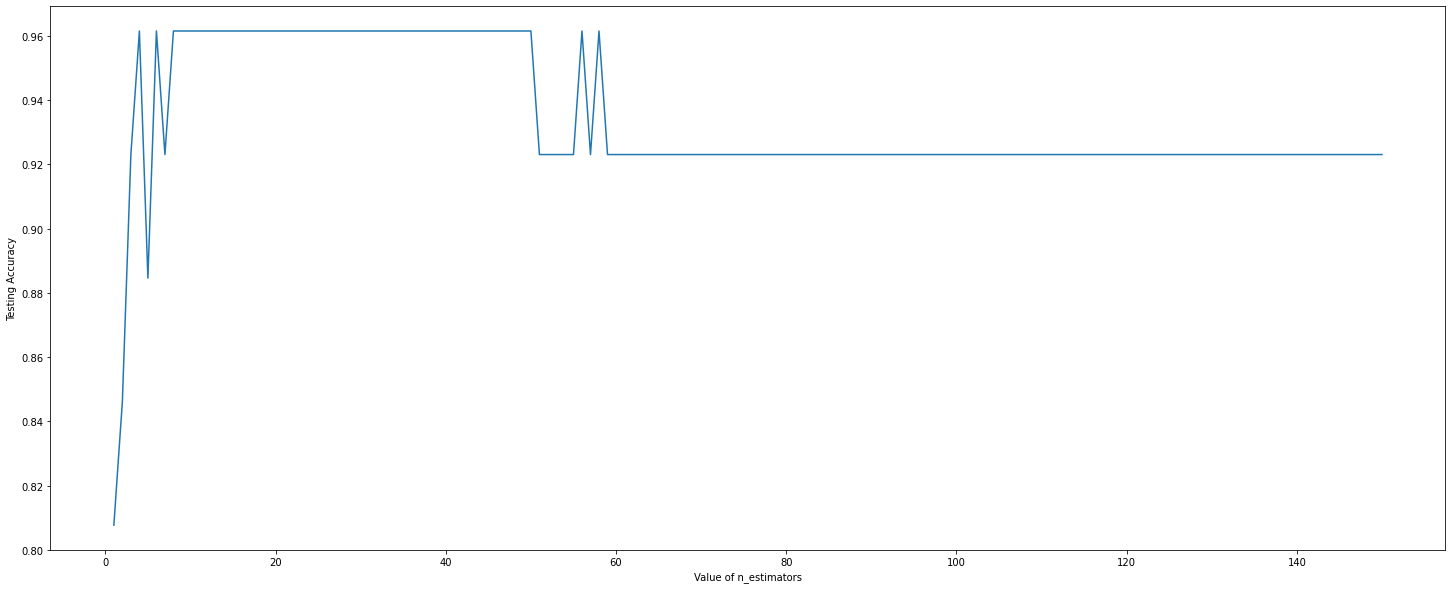

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.7307692307692307
2/150 round completed......................... Accurecy: 0.8461538461538461
3/150 round completed......................... Accurecy: 0.8461538461538461
4/150 round completed......................... Accurecy: 0.8461538461538461
5/150 round completed......................... Accurecy: 0.9230769230769231
6/150 round completed......................... Accurecy: 0.9230769230769231
7/150 round completed......................... Accurecy: 0.9230769230769231
8/150 round completed......................... Accurecy: 0.9230769230769231
9/150 round completed......................... Accurecy: 0.9230769230769231
10/150 round completed......................... Accurecy: 0.9230769230769231
11/150 round completed......................... Accurecy: 0.9230769230769231
12/150 round completed......................... Accurecy: 0.9230769230769231
13/150 round completed......................... Accurecy: 0.9230769230769231
14/150 r

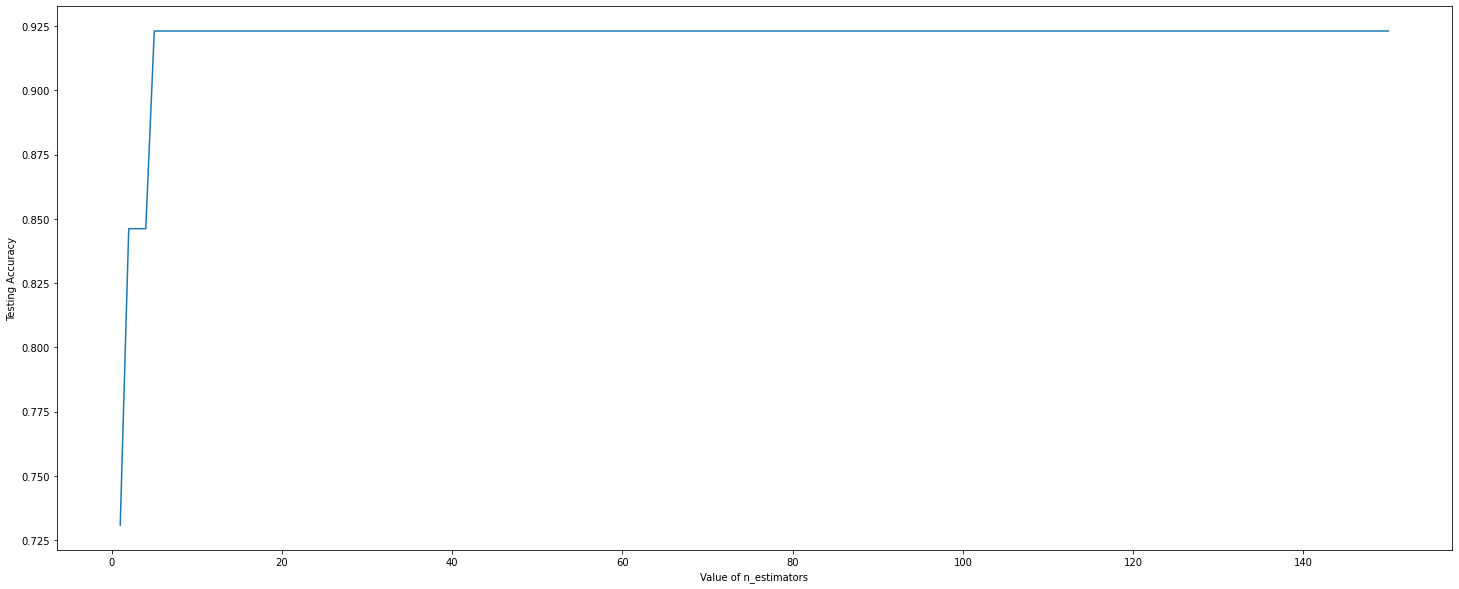

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[12  1]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26

Accurecy:  0.9615384615384616


In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[11  2]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.87      1.00      0.93        13

    accuracy                           0.92        26
   macro avg       0.93      0.92      0.92        26
weighted avg       0.93      0.92      0.92        26

Accurecy:  0.9230769230769231


In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[ 9  4]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.76      1.00      0.87        13

    accuracy                           0.85        26
   macro avg       0.88      0.85      0.84        26
weighted avg       0.88      0.85      0.84        26

Accurecy:  0.8461538461538461




---



---



#XGB

In [70]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[12  1]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26

Accurecy:  0.9615384615384616


1/250 round completed......................... Accurecy: 0.8461538461538461
2/250 round completed......................... Accurecy: 0.8461538461538461
3/250 round completed......................... Accurecy: 0.8846153846153846
4/250 round completed......................... Accurecy: 0.8461538461538461
5/250 round completed......................... Accurecy: 0.8461538461538461
6/250 round completed......................... Accurecy: 0.8461538461538461
7/250 round completed......................... Accurecy: 0.8461538461538461
8/250 round completed......................... Accurecy: 0.8461538461538461
9/250 round completed......................... Accurecy: 0.8461538461538461
10/250 round completed......................... Accurecy: 0.8461538461538461
11/250 round completed......................... Accurecy: 0.8461538461538461
12/250 round completed......................... Accurecy: 0.8461538461538461
13/250 round completed......................... Accurecy: 0.8461538461538461
14/250 r

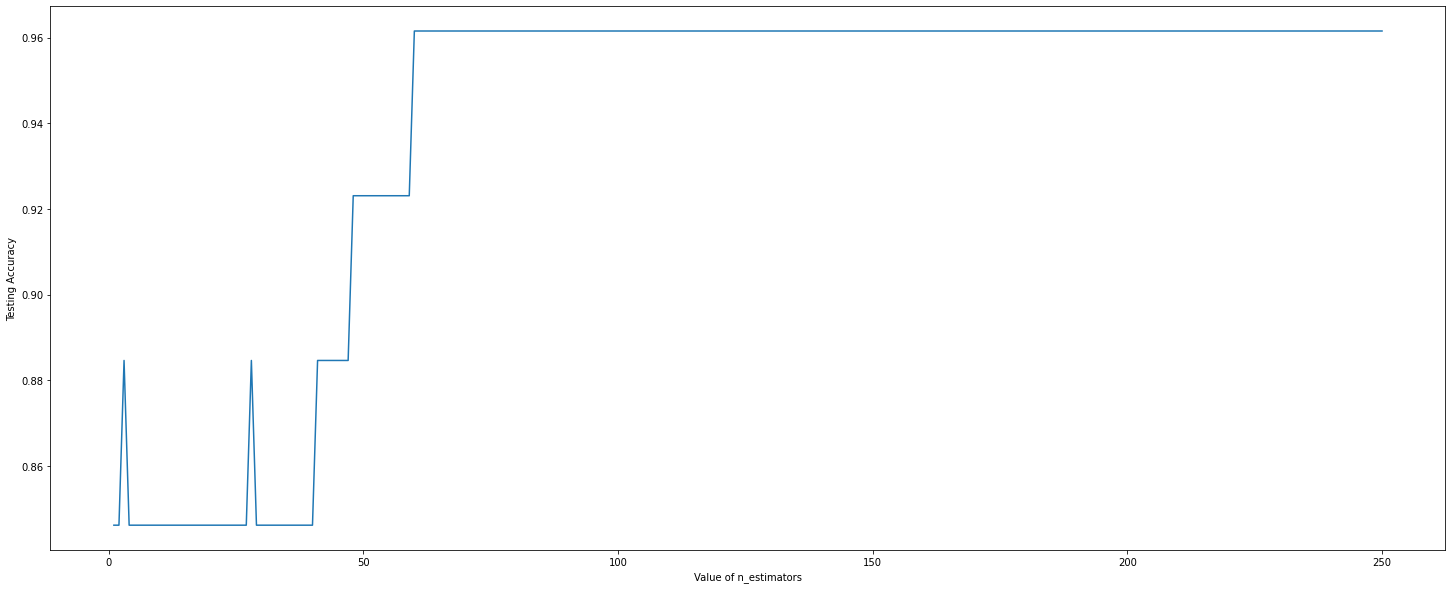

In [71]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.8846153846153846
2/250 round completed......................... Accurecy: 0.8846153846153846
3/250 round completed......................... Accurecy: 0.9615384615384616
4/250 round completed......................... Accurecy: 0.9615384615384616
5/250 round completed......................... Accurecy: 0.9230769230769231
6/250 round completed......................... Accurecy: 0.9615384615384616
7/250 round completed......................... Accurecy: 0.9230769230769231
8/250 round completed......................... Accurecy: 0.9230769230769231
9/250 round completed......................... Accurecy: 0.9230769230769231
10/250 round completed......................... Accurecy: 0.9230769230769231
11/250 round completed......................... Accurecy: 0.9230769230769231
12/250 round completed......................... Accurecy: 0.9230769230769231
13/250 round completed......................... Accurecy: 0.9230769230769231
14/250 r

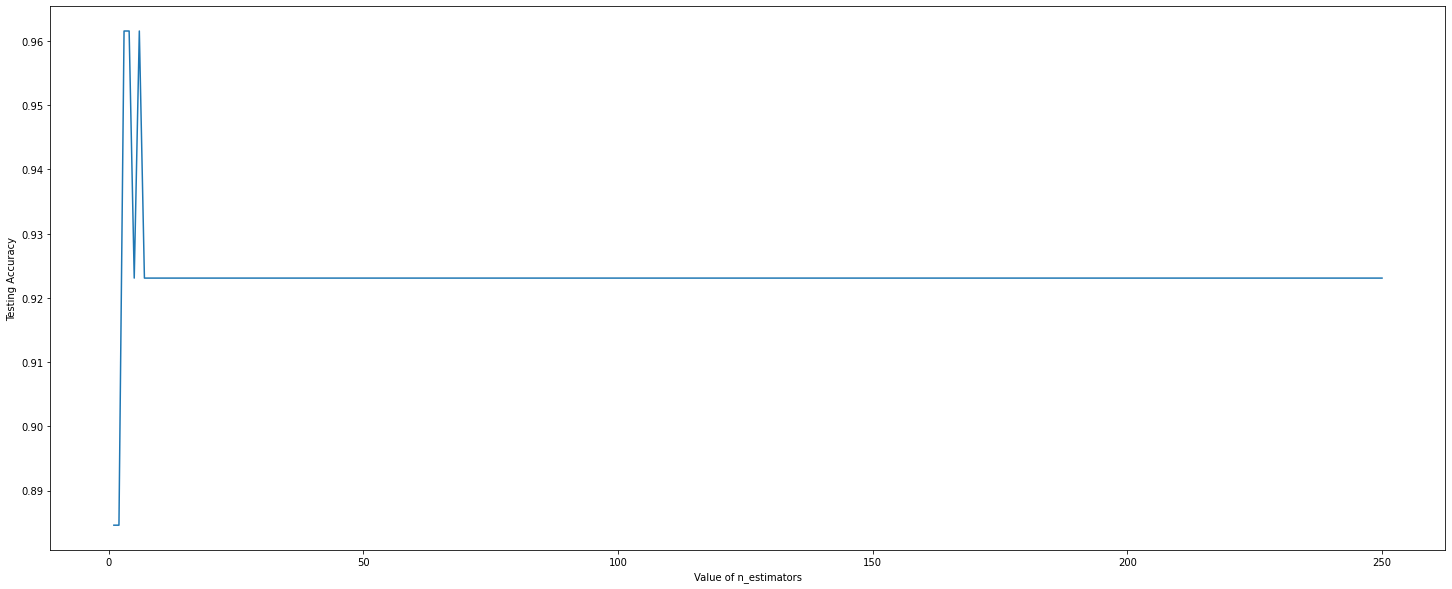

In [72]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [73]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[12  1]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26

Accurecy:  0.9615384615384616
XGBClassifier()


In [74]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[12  1]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26

Accurecy:  0.9615384615384616
XGBClassifier(n_estimators=60)


In [75]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[12  1]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.93      1.00      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26

Accurecy:  0.9615384615384616


#KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[11  2]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.86      0.92      0.89        13

    accuracy                           0.88        26
   macro avg       0.89      0.88      0.88        26
weighted avg       0.89      0.88      0.88        26

Accurecy:  0.8846153846153846


1/130 round completed......................... Accurecy: 0.9230769230769231
2/130 round completed......................... Accurecy: 0.7307692307692307
3/130 round completed......................... Accurecy: 0.8076923076923077
4/130 round completed......................... Accurecy: 0.8461538461538461
5/130 round completed......................... Accurecy: 0.8846153846153846
6/130 round completed......................... Accurecy: 0.7692307692307693
7/130 round completed......................... Accurecy: 0.7307692307692307
8/130 round completed......................... Accurecy: 0.8076923076923077
9/130 round completed......................... Accurecy: 0.7307692307692307
10/130 round completed......................... Accurecy: 0.6923076923076923
11/130 round completed......................... Accurecy: 0.7307692307692307
12/130 round completed......................... Accurecy: 0.7307692307692307
13/130 round completed......................... Accurecy: 0.6923076923076923
14/130 r

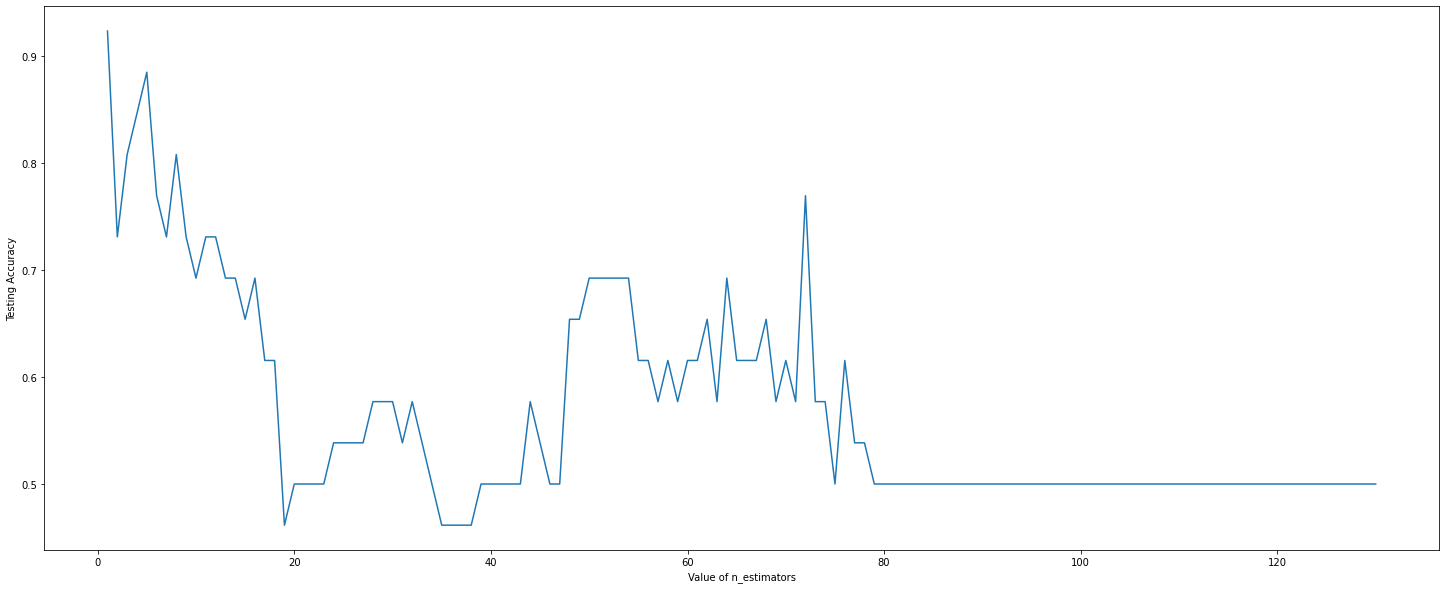

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=130
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[11  2]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.87      1.00      0.93        13

    accuracy                           0.92        26
   macro avg       0.93      0.92      0.92        26
weighted avg       0.93      0.92      0.92        26

Accurecy:  0.9230769230769231


#NB

In [79]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[10  3]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.80      0.92      0.86        13

    accuracy                           0.85        26
   macro avg       0.85      0.85      0.85        26
weighted avg       0.85      0.85      0.85        26

Accurecy:  0.8461538461538461




---



---



#Result

In [80]:
for i in result:
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()

AdaBoostClassifier(random_state=0) 1  :  0.8846153846153846
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=20, random_state=0) 1  :  1.0
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.9615384615384616
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=38, random_state=0) 2  :  0.9615384615384616
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.9615384615384616
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=38, random_state=0) 2  :  0.9615384615384616
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.9230769230769231
---------------------------------------------------------------

RandomForestClassifier(n_estimators=4, random_state=0

In [81]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(AdaBoostClassifier(n_estimators=20, random_state=0), 1, 'AdaBoostClassifier')   :  1.0
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(random_state=0), 2, 'GradientBoostingClassifier')   :  0.9615384615384616
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(n_estimators=38, random_state=0), 2, 'GradientBoostingClassifier')   :  0.9615384615384616
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(random_state=0), 2, 'GradientBoostingClassifier')   :  0.9615384615384616
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(n_estimators=38, random_state=0), 2, 'GradientBoostingClassifier')   :  0.9615384615384616
------------------------------------------------------------------------------

In [82]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(AdaBoostClassifier(n_estimators=20, random_state=0), 'AdaBoostClassifier')
(GradientBoostingClassifier(random_state=0), 'GradientBoostingClassifier')
(RandomForestClassifier(n_estimators=4, random_state=0), 'RandomForestClassifier')
(XGBClassifier(), 'xgboost')


In [83]:
len(best_models)

4

#Testing Accuracy For Best 4 Models

In [84]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_train)
  print(confusion_matrix(y_train, y_pred))
  print(classification_report(y_train,y_pred))
  print("Accurecy: ",accuracy_score(y_train, y_pred))

--------------------------------------------------
AdaBoostClassifier(n_estimators=20, random_state=0)
[[ 61  12]
 [  6 139]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        73
           1       0.92      0.96      0.94       145

    accuracy                           0.92       218
   macro avg       0.92      0.90      0.91       218
weighted avg       0.92      0.92      0.92       218

Accurecy:  0.9174311926605505
--------------------------------------------------
GradientBoostingClassifier(random_state=0)
[[ 73   0]
 [  0 145]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00       145

    accuracy                           1.00       218
   macro avg       1.00      1.00      1.00       218
weighted avg       1.00      1.00      1.00       218

Accurecy:  1.0
--------------------------------------------------
RandomF

#SHAP

In [85]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 8.0 MB/s 


#SHAP MODEL 1

In [86]:
print("Models: ",best_models[0][1])

explainer = shap.Explainer(best_models[0][0].predict, X_test)

shap_values1 = explainer(X_test)
features_names=list_of_feat

if 'Subjects' in features_names:
  features_names.pop(0)

Models:  AdaBoostClassifier


Models:  AdaBoostClassifier(n_estimators=20, random_state=0)


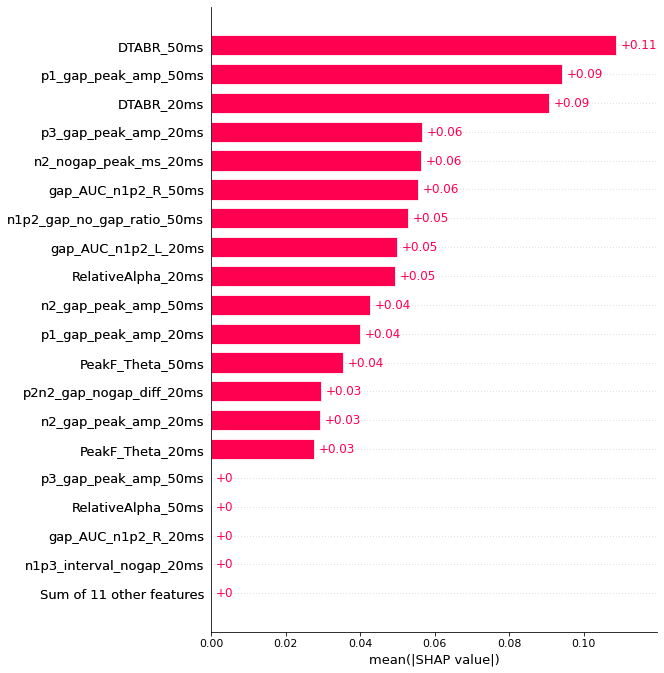

In [87]:
print("Models: ",best_models[0][0])
shap.plots.bar(shap_values1,max_display=20)

Models:  AdaBoostClassifier(n_estimators=20, random_state=0)


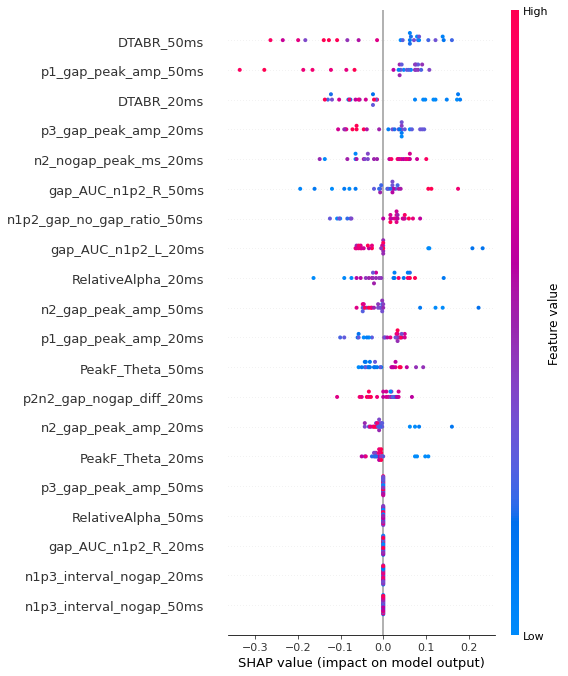

In [88]:
print("Models: ",best_models[0][0])
shap.summary_plot(shap_values1,max_display=20,feature_names=features_names)

**Local Explanation** <br>
You can change the index of <i>shap_values1[index]</i> to accure the desired output. 

Models:  AdaBoostClassifier(n_estimators=20, random_state=0)


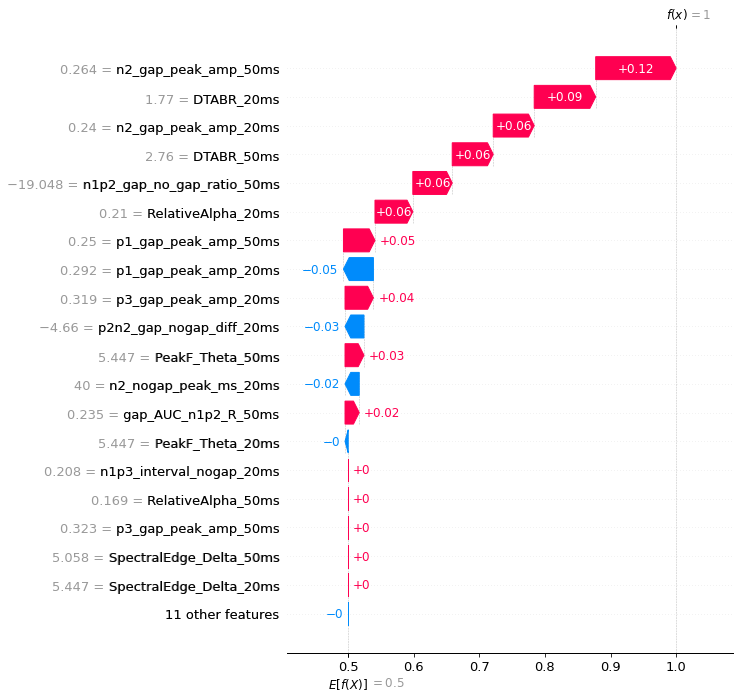

In [89]:
print("Models: ",best_models[0][0])
shap.plots.waterfall(shap_values1[2],max_display=20)

Models:  AdaBoostClassifier(n_estimators=20, random_state=0)


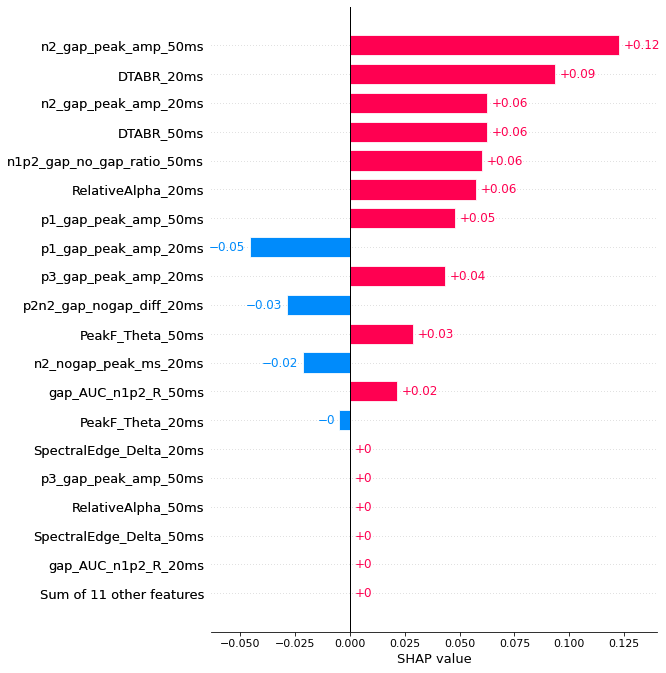

In [90]:
print("Models: ",best_models[0][0])
shap.plots.bar(shap_values1[2],max_display=20)

#SHAP MODEL2

In [91]:
print("Models: ",best_models[1][0])

explainer = shap.Explainer(best_models[1][0].predict, X_test)

shap_values2 = explainer(X_test)
features_names=list_of_feat

Models:  GradientBoostingClassifier(random_state=0)


**Global Explanation**

Models:  GradientBoostingClassifier(random_state=0)


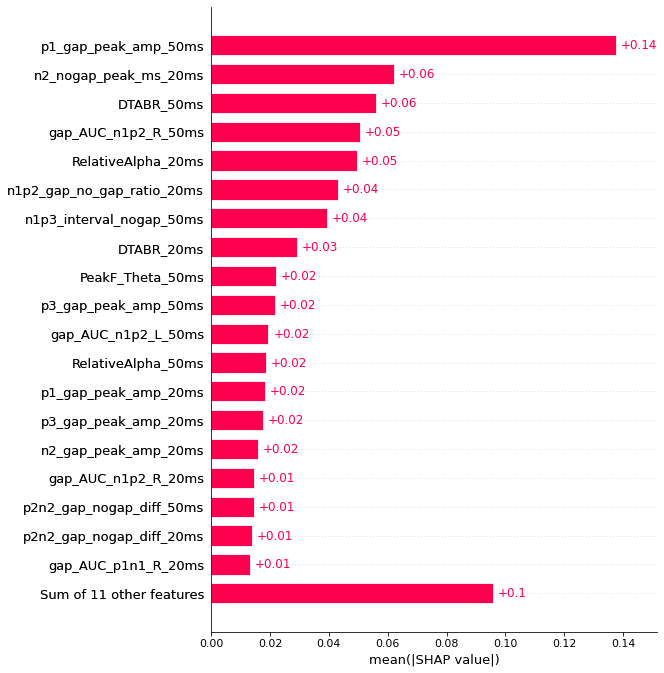

In [92]:
print("Models: ",best_models[1][0])
shap.plots.bar(shap_values2,max_display=20)

Models:  GradientBoostingClassifier(random_state=0)


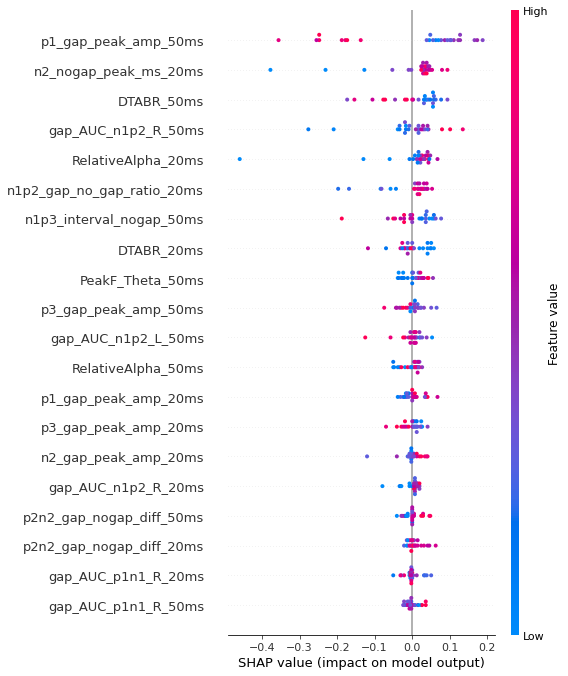

In [93]:
print("Models: ",best_models[1][0])
shap.summary_plot(shap_values2,max_display=20,feature_names=features_names)

**Local Explanation**

Models:  GradientBoostingClassifier(random_state=0)


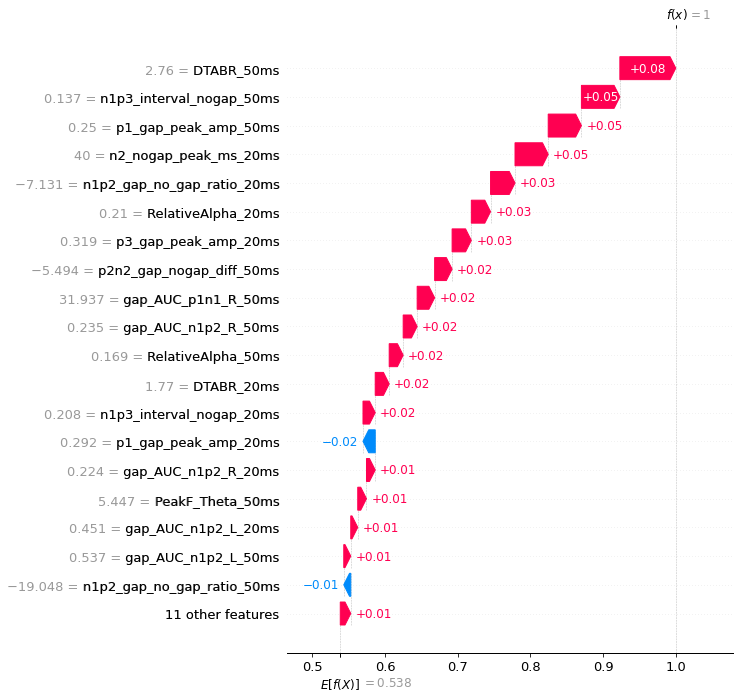

In [94]:
print("Models: ",best_models[1][0])
shap.plots.waterfall(shap_values2[2],max_display=20)

Models:  GradientBoostingClassifier(random_state=0)


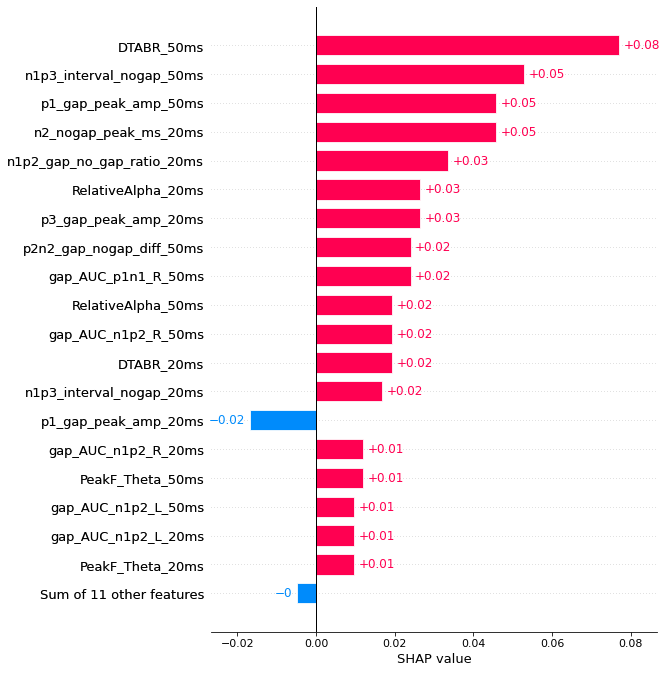

In [95]:
print("Models: ",best_models[1][0])
shap.plots.bar(shap_values2[2],max_display=20)

#SHAP MODEL 3

In [96]:
print("Models: ",best_models[2][0])

explainer = shap.Explainer(best_models[2][0].predict, X_test)

shap_values3 = explainer( X_test)
features_names=list_of_feat

Models:  RandomForestClassifier(n_estimators=4, random_state=0)


**Global**

Models:  RandomForestClassifier(n_estimators=4, random_state=0)


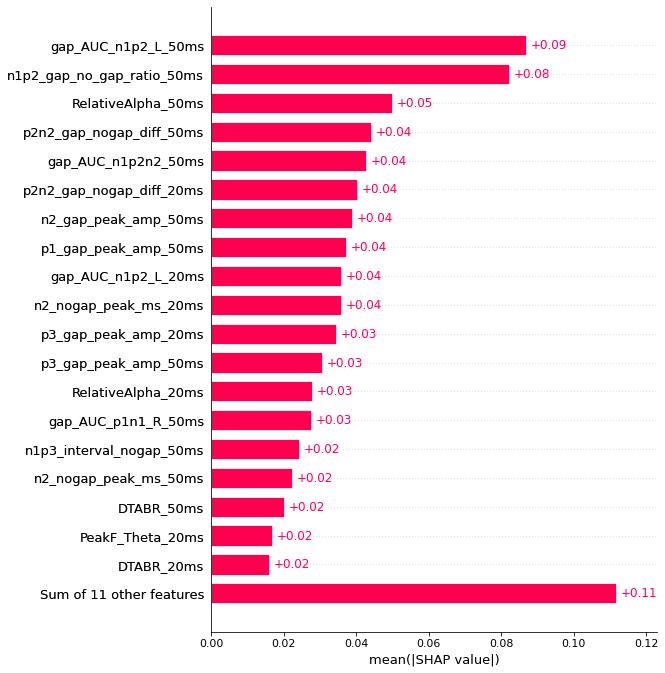

In [97]:
print("Models: ",best_models[2][0])
shap.plots.bar(shap_values3,max_display=20)

Models:  RandomForestClassifier(n_estimators=4, random_state=0)


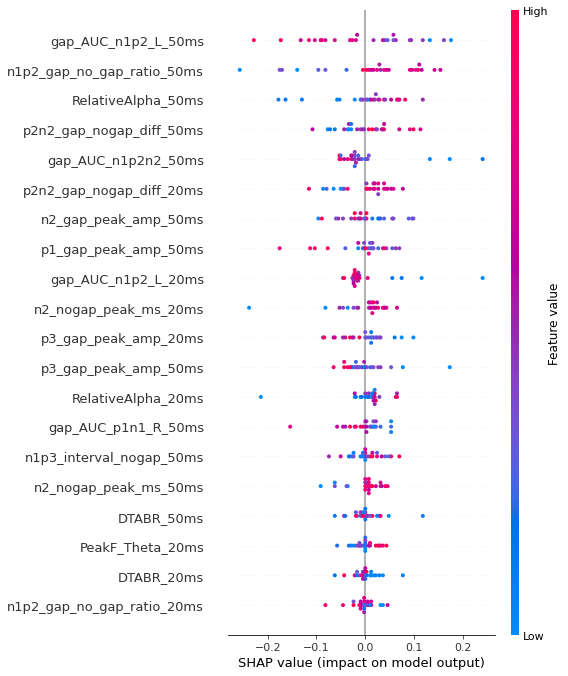

In [98]:
print("Models: ",best_models[2][0])
shap.summary_plot(shap_values3,max_display=20,feature_names=features_names)

**LOCAL**

Models:  RandomForestClassifier(n_estimators=4, random_state=0)


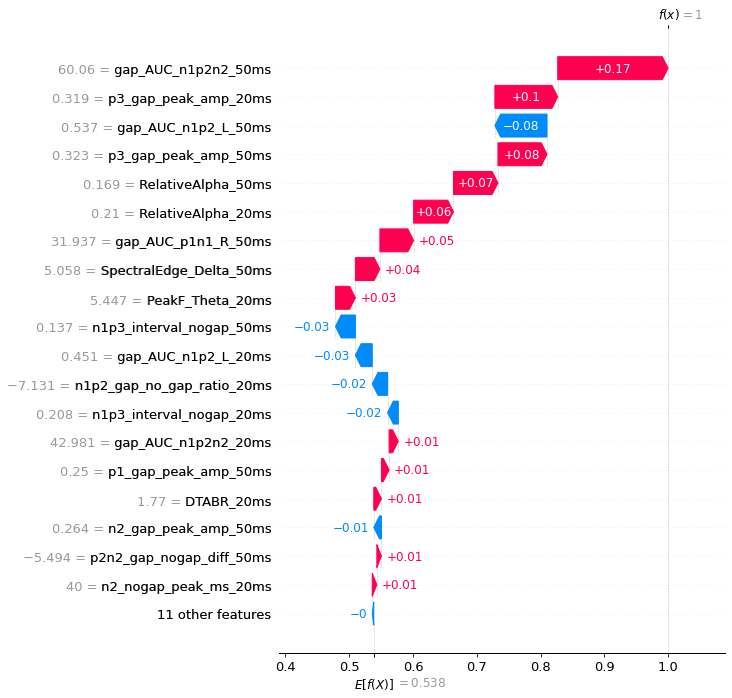

In [99]:
print("Models: ",best_models[2][0])
shap.plots.waterfall(shap_values3[2],max_display=20)

Models:  RandomForestClassifier(n_estimators=4, random_state=0)


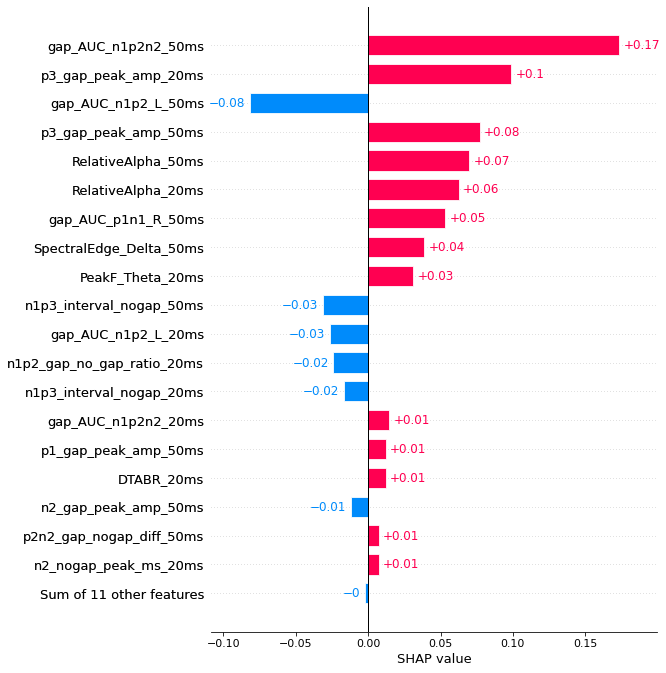

In [100]:
print("Models: ",best_models[2][0])
shap.plots.bar(shap_values3[2],max_display=20)

#Confusion Matrix For Testing

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names


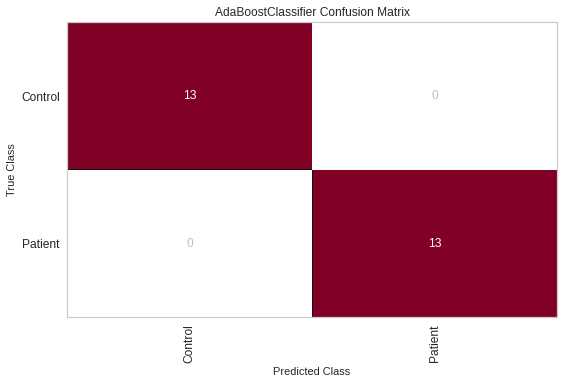

In [101]:

from yellowbrick.classifier import ConfusionMatrix


cm = ConfusionMatrix(best_models[0][0], classes=classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


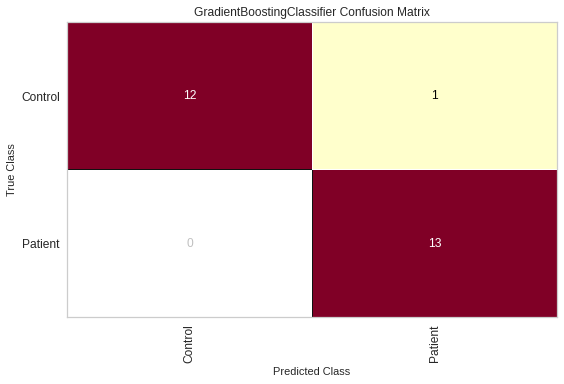

In [102]:
cm2 = ConfusionMatrix(best_models[1][0], classes=classes)

cm2.fit(X_train, y_train)
cm2.score(X_test, y_test)
cm2.show()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


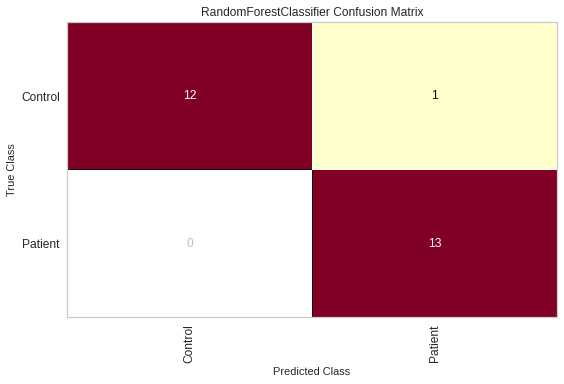

In [103]:


cm3 = ConfusionMatrix(best_models[2][0], classes=classes)

cm3.fit(X_train, y_train)
cm3.score(X_test, y_test)
cm3.show()

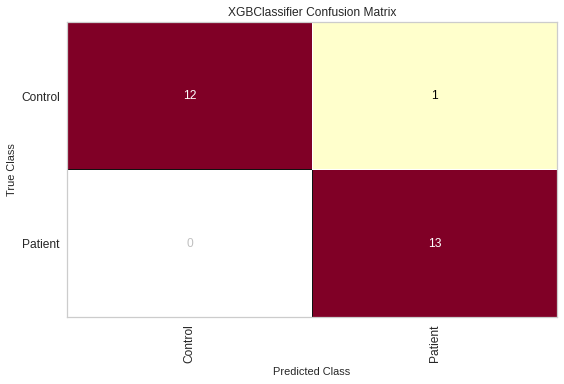

In [104]:
cm4 = ConfusionMatrix(best_models[3][0], classes=classes)

cm4.fit(X_train, y_train)
cm4.score(X_test, y_test)
cm4.show()

#Confusion Matrix For Training

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names


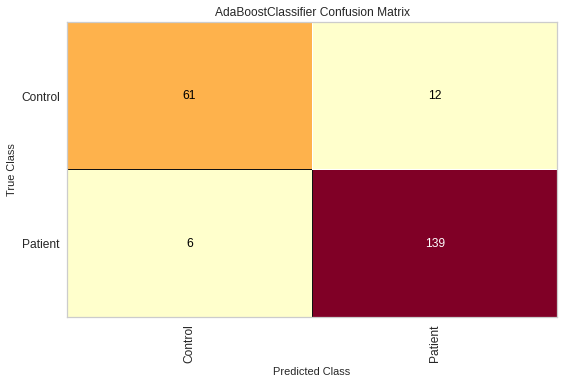

In [105]:
cm1 = ConfusionMatrix(best_models[0][0], classes=classes)

cm1.fit(X_train, y_train)
cm1.score(X_train, y_train)
cm1.show()

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


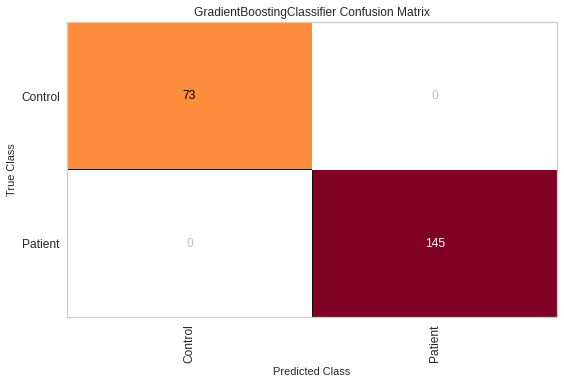

In [106]:
cm1 = ConfusionMatrix(best_models[1][0], classes=classes)

cm1.fit(X_train, y_train)
cm1.score(X_train, y_train)
cm1.show()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


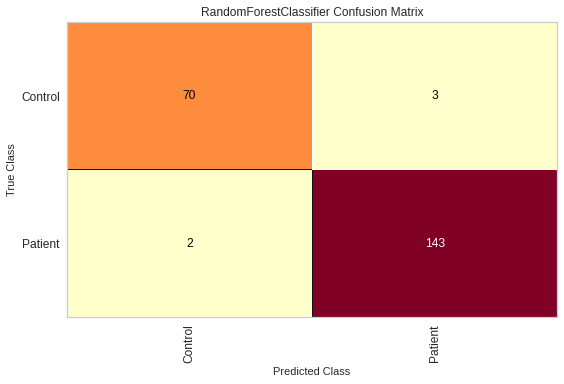

In [107]:
cm1 = ConfusionMatrix(best_models[2][0], classes=classes)

cm1.fit(X_train, y_train)
cm1.score(X_train, y_train)
cm1.show()

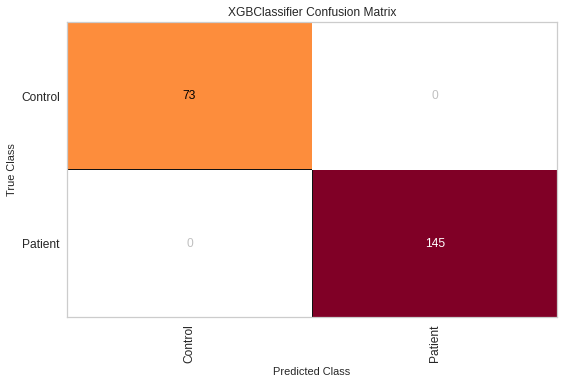

In [108]:
cm1 = ConfusionMatrix(best_models[3][0], classes=classes)

cm1.fit(X_train, y_train)
cm1.score(X_train, y_train)
cm1.show()

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [109]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Patient'
  return my_list

In [110]:
for i in range(len(best_models)):
  temp=X_test_with_subject

  prediction_cls = reverse_transfrom(list(best_models[i][0].predict(X_test[0:])))
  actual_cls = reverse_transfrom(list(y_test[0:]))

  temp["Actual"] = actual_cls
  temp["Predicted"] = prediction_cls

  temp.to_csv(best_models[i][1]+".csv")


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

#ROC Comparaing Machine Learning Models

**ROC AUC Testing**

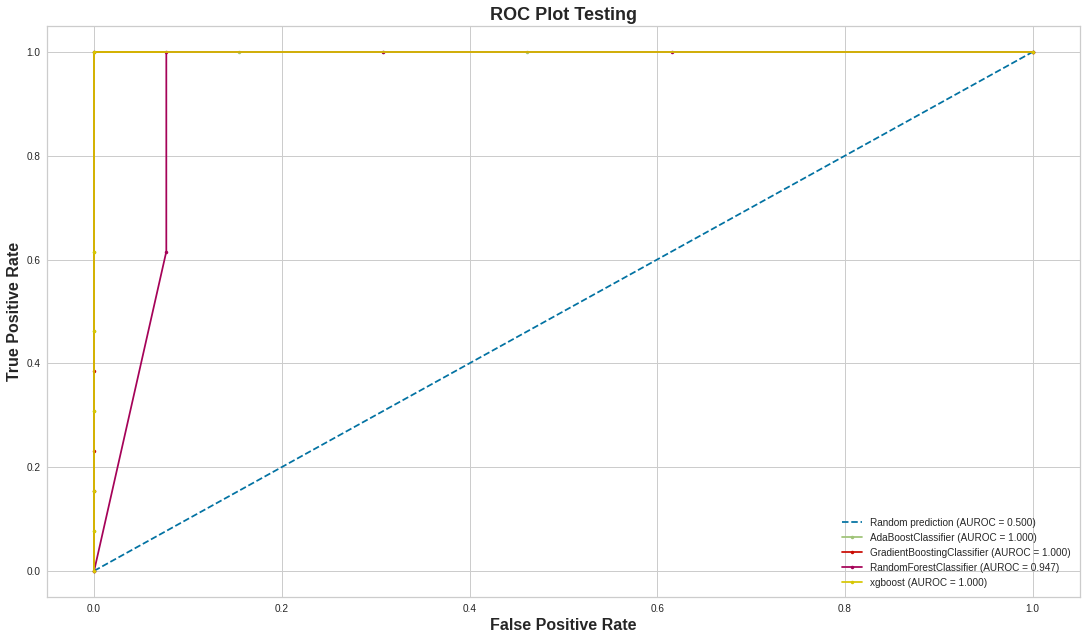

In [111]:

r_probs = [0 for _ in range(len(y_test))]
model1_probs = best_models[0][0].predict_proba(X_test)
model2_probs = best_models[1][0].predict_proba(X_test)
if len(best_models)>2:
  model3_probs=  best_models[2][0].predict_proba(X_test)
if len(best_models)>3:
  model4_probs=  best_models[3][0].predict_proba(X_test)


model1_probs = model1_probs[:, 1]
model2_probs = model2_probs[:, 1]
if len(best_models)>2:
  model3_probs=  model3_probs[:, 1]
if len(best_models)>3:
  model4_probs=  model4_probs[:, 1]



from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_test, r_probs)
model1_auc = roc_auc_score(y_test, model1_probs)
model2_auc = roc_auc_score(y_test, model2_probs)
if len(best_models)>2:
  model3_auc = roc_auc_score(y_test, model3_probs)
if len(best_models)>3:
  model4_auc = roc_auc_score(y_test, model4_probs)



r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
model1_fpr, model1_tpr, _ = roc_curve(y_test, model1_probs)
model2_fpr, model2_tpr, _ = roc_curve(y_test, model2_probs)
if len(best_models)>2:
  model3_fpr, model3_tpr, _ = roc_curve(y_test, model3_probs)
if len(best_models)>3:
  model4_fpr, model4_tpr, _ = roc_curve(y_test, model4_probs)



import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(model1_fpr, model1_tpr, marker='.', label=best_models[0][1]+' (AUROC = %0.3f)' % model1_auc)
plt.plot(model2_fpr, model2_tpr, marker='.', label=best_models[1][1]+' (AUROC = %0.3f)' % model2_auc)
if len(best_models)>2:
  plt.plot(model3_fpr, model3_tpr, marker='.', label=best_models[2][1]+' (AUROC = %0.3f)' % model3_auc)
if len(best_models)>3:
  plt.plot(model4_fpr, model4_tpr, marker='.', label=best_models[3][1]+' (AUROC = %0.3f)' % model4_auc)

# Title
plt.title('ROC Plot Testing',fontsize= 18, fontweight='bold')
plt.xlabel('False Positive Rate',fontweight='bold',fontsize=16)
plt.ylabel('True Positive Rate',fontweight='bold',fontsize=16)
plt.legend() 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('ROC_Testing.png', dpi=100)
plt.show()

**ROC-AUC For Training Phase**

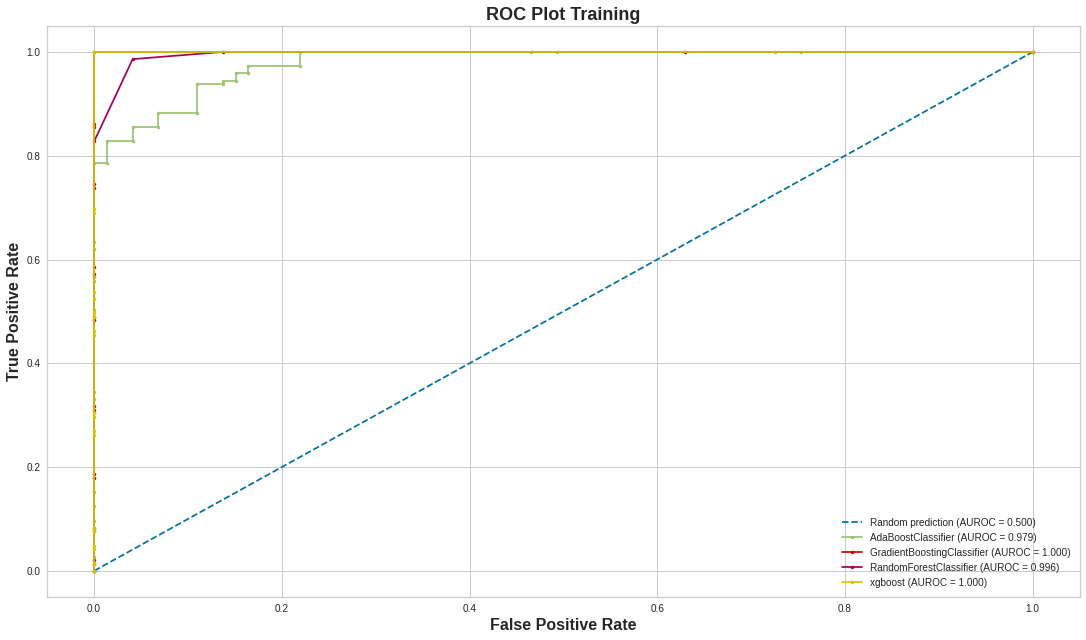

In [112]:

r_probs = [0 for _ in range(len(y_train))]
model1_probs = best_models[0][0].predict_proba(X_train)
model2_probs = best_models[1][0].predict_proba(X_train)
if len(best_models)>2:
  model3_probs=  best_models[2][0].predict_proba(X_train)
if len(best_models)>3:
  model4_probs=  best_models[3][0].predict_proba(X_train)


model1_probs = model1_probs[:, 1]
model2_probs = model2_probs[:, 1]
if len(best_models)>2:
  model3_probs=  model3_probs[:, 1]
if len(best_models)>3:
  model4_probs=  model4_probs[:, 1]



from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_train, r_probs)
model1_auc = roc_auc_score(y_train, model1_probs)
model2_auc = roc_auc_score(y_train, model2_probs)
if len(best_models)>2:
  model3_auc = roc_auc_score(y_train, model3_probs)
if len(best_models)>3:
  model4_auc = roc_auc_score(y_train, model4_probs)



r_fpr, r_tpr, _ = roc_curve(y_train, r_probs)
model1_fpr, model1_tpr, _ = roc_curve(y_train, model1_probs)
model2_fpr, model2_tpr, _ = roc_curve(y_train, model2_probs)
if len(best_models)>2:
  model3_fpr, model3_tpr, _ = roc_curve(y_train, model3_probs)
if len(best_models)>3:
  model4_fpr, model4_tpr, _ = roc_curve(y_train, model4_probs)



import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(model1_fpr, model1_tpr, marker='.', label=best_models[0][1]+' (AUROC = %0.3f)' % model1_auc)
plt.plot(model2_fpr, model2_tpr, marker='.', label=best_models[1][1]+' (AUROC = %0.3f)' % model2_auc)
if len(best_models)>2:
  plt.plot(model3_fpr, model3_tpr, marker='.', label=best_models[2][1]+' (AUROC = %0.3f)' % model3_auc)
if len(best_models)>3:
  plt.plot(model4_fpr, model4_tpr, marker='.', label=best_models[3][1]+' (AUROC = %0.3f)' % model4_auc)

# Title
plt.title('ROC Plot Training',fontsize= 18, fontweight='bold')
plt.xlabel('False Positive Rate',fontweight='bold',fontsize=16)
plt.ylabel('True Positive Rate',fontweight='bold',fontsize=16)
plt.legend() 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('ROC_Training.png', dpi=100)
plt.show()